# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

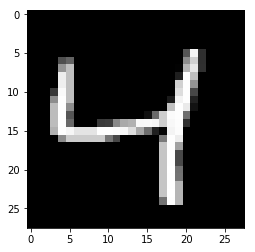

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [24]:
# remove the privious graph (for repeat resume)
tf.reset_default_graph()

# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None,784), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None,784), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu, 
                          kernel_initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0))

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False), activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss (vector)
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss (batch_loss)
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [25]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [26]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6953
Epoch: 1/20... Training loss: 0.6918
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6800
Epoch: 1/20... Training loss: 0.6745
Epoch: 1/20... Training loss: 0.6682
Epoch: 1/20... Training loss: 0.6609
Epoch: 1/20... Training loss: 0.6525
Epoch: 1/20... Training loss: 0.6427
Epoch: 1/20... Training loss: 0.6300
Epoch: 1/20... Training loss: 0.6166
Epoch: 1/20... Training loss: 0.6035
Epoch: 1/20... Training loss: 0.5868
Epoch: 1/20... Training loss: 0.5745
Epoch: 1/20... Training loss: 0.5554
Epoch: 1/20... Training loss: 0.5349
Epoch: 1/20... Training loss: 0.5145
Epoch: 1/20... Training loss: 0.4968
Epoch: 1/20... Training loss: 0.4798
Epoch: 1/20... Training loss: 0.4652
Epoch: 1/20... Training loss: 0.4478
Epoch: 1/20... Training loss: 0.4317
Epoch: 1/20... Training loss: 0.4138
Epoch: 1/20... Training loss: 0.4004
Epoch: 1/20... Training loss: 0.3898
Epoch: 1/20... Training loss: 0.3738
E

Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1820
Epoch: 2/20... Training loss: 0.1684
Epoch: 2/20... Training loss: 0.1769
Epoch: 2/20... Training loss: 0.1766
Epoch: 2/20... Training loss: 0.1757
Epoch: 2/20... Training loss: 0.1779
Epoch: 2/20... Training loss: 0.1827
Epoch: 2/20... Training loss: 0.1749
Epoch: 2/20... Training loss: 0.1826
Epoch: 2/20... Training loss: 0.1804
Epoch: 2/20... Training loss: 0.1747
Epoch: 2/20... Training loss: 0.1771
Epoch: 2/20... Training loss: 0.1766
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1899
Epoch: 2/20... Training loss: 0.1760
Epoch: 2/20... Training loss: 0.1740
Epoch: 2/20... Training loss: 0.1718
Epoch: 2/20... Training loss: 0.1754
Epoch: 2/20... Training loss: 0.1760
Epoch: 2/20... Training loss: 0.1756
Epoch: 2/20... Training loss: 0.1779
Epoch: 2/20... Training loss: 0.1776
Epoch: 2/20... Training loss: 0.1757
Epoch: 2/20... Training loss: 0.1752
Epoch: 2/20... Training loss: 0.1816
E

Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1468
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1412
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1429
Epoch: 2/20... Training loss: 0.1437
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1433
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1449
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1442
Epoch: 2/20... Training loss: 0.1423
Epoch: 2/20... Training loss: 0.1505
E

Epoch: 3/20... Training loss: 0.1247
Epoch: 3/20... Training loss: 0.1251
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1254
E

Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1164
E

Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1044
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1075
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1033
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0923
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1053
E

Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.1016
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0976
E

Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.1010
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... 

Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0881
Epoch: 12/20... Training loss: 0.1006
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0884
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0991
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

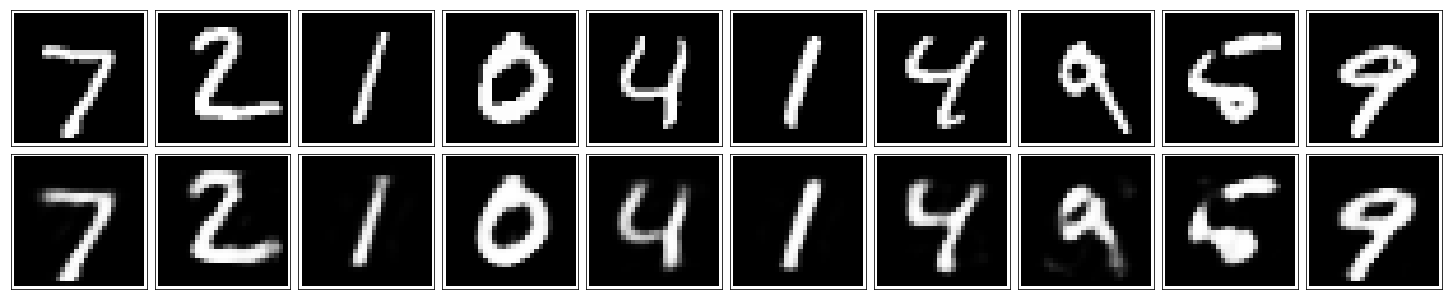

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [28]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.